# TNK Benchmark
## Imports

In [ ]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd

import bofire.strategies.api as strategies
from bofire.benchmarks.api import TNK
from bofire.data_models.api import Domain
from bofire.data_models.strategies.api import MoboStrategy, RandomStrategy
from bofire.runners.api import run
from bofire.utils.multiobjective import compute_hypervolume


warnings.simplefilter("once")
SMOKE_TEST = os.environ.get("SMOKE_TEST")

## Random Strategy

In [ ]:
def sample(domain):
    datamodel = RandomStrategy(domain=domain)
    sampler = strategies.map(data_model=datamodel)
    sampled = sampler.ask(10)
    return sampled


def hypervolume(domain: Domain, experiments: pd.DataFrame) -> float:
    return compute_hypervolume(
        domain,
        experiments.loc[(experiments.c1 >= 0) & (experiments.c2 <= 0.5)],
        ref_point={"f1": 4, "f2": 4},
    )


random_results = run(
    TNK(),
    strategy_factory=lambda domain: strategies.map(RandomStrategy(domain=domain)),
    n_iterations=100 if not SMOKE_TEST else 1,
    metric=hypervolume,
    initial_sampler=sample,
    n_runs=1,
    n_procs=1,
)

run 00 with current best 11.699: 100%|██████████| 100/100 [00:01<00:00, 97.66it/s]


## MOBO Strategy


In [ ]:
def strategy_factory(domain: Domain):
    data_model = MoboStrategy(domain=domain, ref_point={"f1": 4.0, "f2": 4.0})
    return strategies.map(data_model)


results = run(
    TNK(),
    strategy_factory=strategy_factory,
    n_iterations=100 if not SMOKE_TEST else 1,
    metric=hypervolume,
    initial_sampler=sample,
    n_runs=1,
    n_procs=1,
)

run 00 with current best 14.850:  35%|███▌      | 35/100 [05:22<14:58, 13.82s/it]/Users/j30607/sandbox/botorch/botorch/optim/optimize.py:564: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(opt_inputs=opt_inputs)
run 00 with current best 14.900:  45%|████▌     | 45/100 [08:21<14:56, 16.30s/it]/Users/j30607/sandbox/botorch/botorch/optim/optimize.py:564: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.')]
Trying again with a new set of initial conditions.
  return _optimize_acqf_batch(

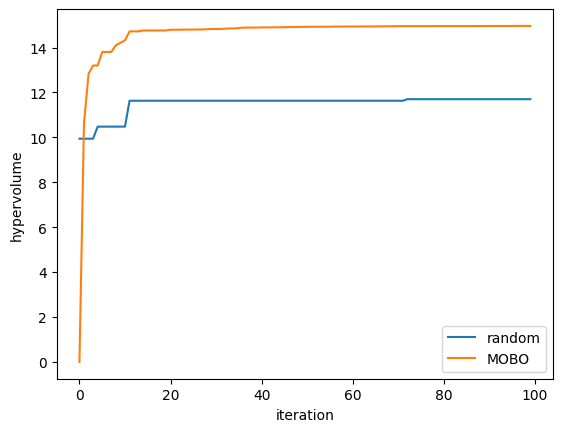

In [ ]:
if not SMOKE_TEST:
    fig, ax = plt.subplots()
    ax.plot(random_results[0][1], label="random")
    ax.plot(results[0][1], label="MOBO")
    ax.set_xlabel("iteration")
    ax.set_ylabel("hypervolume")
    ax.legend()
    plt.show()